In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 32 × Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, haswell)
Threads: 1 default, 0 interactive, 1 GC (on 32 virtual cores)
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


In [2]:
# set the output format of gr backend to png. default is svg, which maldisplays in jupyter pages (after restart).
# StatsPlots has an identical gr() function.
@time using Plots;
#gr(fmt = "png")
@time gr(fmt = :png)

@time using StatsPlots; 
@time gr(fmt = :png)

  2.408263 seconds (1.48 M allocations: 97.717 MiB, 5.35% gc time, 9.00% compilation time: 84% of which was recompilation)
  0.000051 seconds (5 allocations: 576 bytes)
  1.333060 seconds (749.82 k allocations: 39.052 MiB, 4.62% gc time, 1.68% compilation time: 100% of which was recompilation)
  0.000065 seconds (5 allocations: 576 bytes)


Plots.GRBackend()

In [3]:
using Turing
using DataFrames
using Logging
using CSV

# setting default attributes for plots
default(labels=false)

# Code 0.1

In [3]:
println("All models are wrong, but some are useful!")

All models are wrong, but some are useful!


# Code 0.2

In [4]:
@show x = range(1, 2, length=2)
@time @show x = x .* 10 .|> log |> sum |> exp
x 

x = range(1, 2, length = 2) = 1.0:1.0:2.0
x = ((x .* 10 .|> log) |> sum) |> exp = 200.0000000000001
  0.171880 seconds (241.69 k allocations: 16.108 MiB, 99.49% compilation time)


200.0000000000001

# Code 0.3

In [5]:
@time [
    log(0.01^200); 
    200 * log(0.01)
]

  0.000001 seconds (1 allocation: 80 bytes)


2-element Vector{Float64}:
  -Inf
 -921.0340371976182

# Code 0.4

 24.753495 seconds (37.05 M allocations: 2.382 GiB, 7.17% gc time, 98.65% compilation time)


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 10.49 seconds
Compute duration  = 10.49 seconds
parameters        = a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std      mcse   ess_bulk   ess_tail      rhat    ⋯
      Symbol    Float64   Float64   Float64    Float64    Float64   Float64    ⋯

           a   -17.5400    0.4177    0.0277   231.9097   262.1596    1.0111    ⋯
           b     3.9298    0.0255    0.0017   231.9293   219.0876    1.0061    ⋯
                                                                1 column omitted

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 


resid = df.dist - (mean_a .+ mean_b * df.speed) = [3.8209541186060285, 11.820954118606029, -5.968353025970934, 12.031646974029066, 2.101877925836746, -7.827891122355574, -3.7576601705478936, 4.242339829452106, 12.242339829452106, -8.687429218740213, 2.3125707812597867, -15.61719826693254, -9.61719826693254, -5.61719826693254, -1.6171982669325402, -7.54696731512486, 0.45303268487514003, 0.45303268487514003, 12.45303268487514, -11.47673636331718, -1.4767363633171797, 22.52326363668282, 42.52326363668282, -21.4065054115095, -15.4065054115095, 12.5934945884905, -13.33627445970182, -5.336274459701819, -17.266043507894146, -9.266043507894146, 0.7339564921058539, -11.195812556086459, 2.8041874439135412, 22.80418744391354, 30.80418744391354, -21.125581604278786, -11.125581604278786, 10.874418395721214, -29.0553506524711, -13.055350652471098, -9.055350652471098, -5.055350652471098, 2.9446493475289017, -2.9148887488557307, -18.844657797048058, -6.774426845240384, 15.225573154759616, 16.225573154

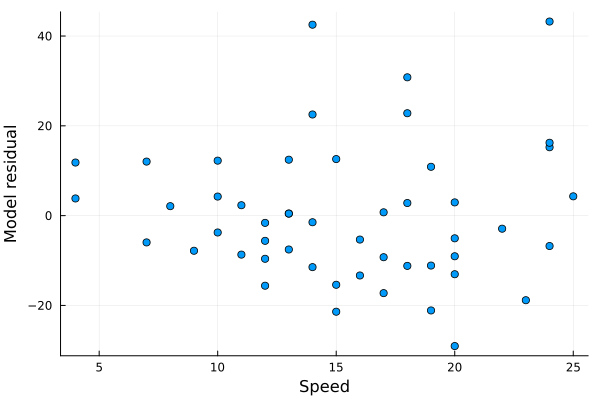

In [6]:
# load data
df = DataFrame(CSV.File("data/cars.csv"));

# fit a linear regression on distance on speed
@model function speed_dist(speed, dist)
    a ~ Uniform(-20, 20)
    b ~ Uniform(1, 5)
    m = a .+ b * speed
    dist ~ MvNormal(m, 1)
end

Logging.disable_logging(Logging.Warn)
@time chain = sample(speed_dist(df.speed, df.dist), NUTS(0.65), 1000)
display(chain)

# extract mean params
mean_a, mean_b = mean(chain)[:,:mean]

# get residuals of the data
@time @show resid = df.dist - (mean_a .+ mean_b * df.speed);
scatter(df.speed, resid; xlabel = "Speed", ylabel = "Model residual")

# Code 0.5

In [7]:
import Pkg
# this list of dependencies might be incomplete, as I'm not maintaining it.
# please check Project.toml for the full list
Pkg.add(["Turing", "CSV", "DataFrames", "Plots", "StatsPlots", "StatisticalRethinking"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
Precompiling project...
  ✓ LogDensityProblemsAD → LogDensityProblemsADForwardDiffBenchmarkToolsExt
  ✓ StatsModels
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  ✓ Plots → GeometryBasicsExt
  ✓ RCall
  ✓ SciMLBase → SciMLBaseRCallExt
  ✓ StatsPlots
  ✓ Turing
  ✓ Turing → TuringOptimExt
  ✓ StatisticalRethinkingPlots
  ✓ ImageCore
  ✓ ImageBase
  ✓ PNGFiles
  ✓ ImageAxes
  ✓ ImageMetadata
  ✓ Netpbm
  ✓ ImageIO
  ✓ Makie
  ✓ PairPlots
  ✓ CairoMakie
  ✓ PairPlots → MCMCChainsExt
  22 dependencies successfully precompiled in 240 seconds. 455 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version
